In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [3]:
#Loading the Dataset
df = pd.read_csv("C:/Users/RAMCHARAN/Downloads/Titanic-Dataset (1).csv")  # Make sure the CSV is in the same directory
print("First 5 rows:")
print(df.head())


First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [4]:
#  Data Overview
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Summary Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.6

In [5]:
#Check for Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


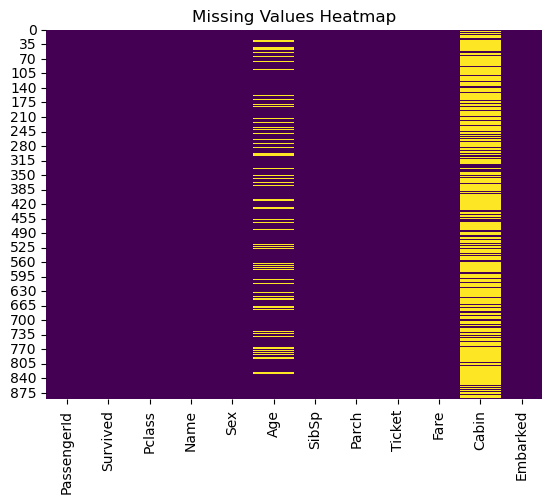

In [6]:
#  Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [7]:
# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())
# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# Drop Cabin due to too many nulls
df.drop(columns=['Cabin'], inplace=True)

In [8]:
# Encoding Categorical Variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [9]:
#Feature Scaling 
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [16]:
#Outlier Detection & Removal
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]




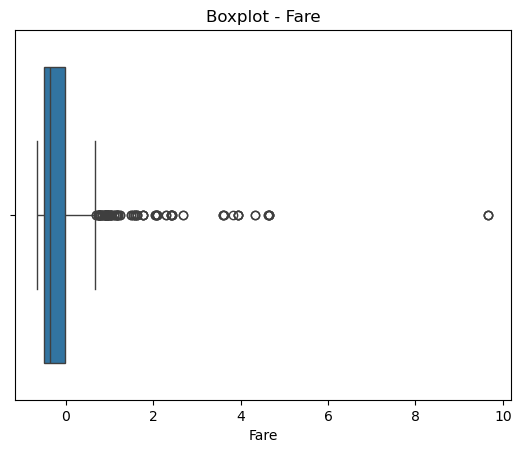

In [17]:
# Visualize outliers
sns.boxplot(x=df['Fare'])
plt.title("Boxplot - Fare")
plt.show()


In [18]:
# Remove outliers from Fare
df = remove_outliers_iqr(df, 'Fare')

In [19]:
#Final Dataset Check
print("\n--- Cleaned Dataset Info ---")
print(df.info())
print("\n--- Final Columns ---")
print(df.columns)


--- Cleaned Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Age          775 non-null    float64
 5   SibSp        775 non-null    int64  
 6   Parch        775 non-null    int64  
 7   Ticket       775 non-null    object 
 8   Fare         775 non-null    float64
 9   Sex_male     775 non-null    bool   
 10  Embarked_Q   775 non-null    bool   
 11  Embarked_S   775 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 62.8+ KB
None

--- Final Columns ---
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [20]:
df.to_csv('Titanic_Cleaned.csv', index=False)
print("✅ Cleaned dataset saved as Titanic_Cleaned.csv")


✅ Cleaned dataset saved as Titanic_Cleaned.csv
